In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import math
import kagglehub
from kagglehub import KaggleDatasetAdapter

import os
import shutil

import matplotlib.pyplot as plt
import seaborn as sns

/Users/damiantchuma/coding/Ai/regression/simple-regression/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/damiantchuma/coding/Ai/regression/simple-regression/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [42]:
# Download the dataset and get the path to the cached files
path = kagglehub.dataset_download("yasserh/housing-prices-dataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/damiantchuma/.cache/kagglehub/datasets/yasserh/housing-prices-dataset/versions/1


In [43]:
dest = os.getcwd()

# Copy all files from cache path into your current folder
for file_name in os.listdir(path):
    full_file_name = os.path.join(path, file_name)
    if os.path.isfile(full_file_name):
        shutil.copy(full_file_name, dest)


In [44]:
df = pd.read_csv(file_name)

In [45]:
print("First 5 records:", df.head())


First 5 records:       price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


IndexError: index 5 is out of bounds for axis 0 with size 5

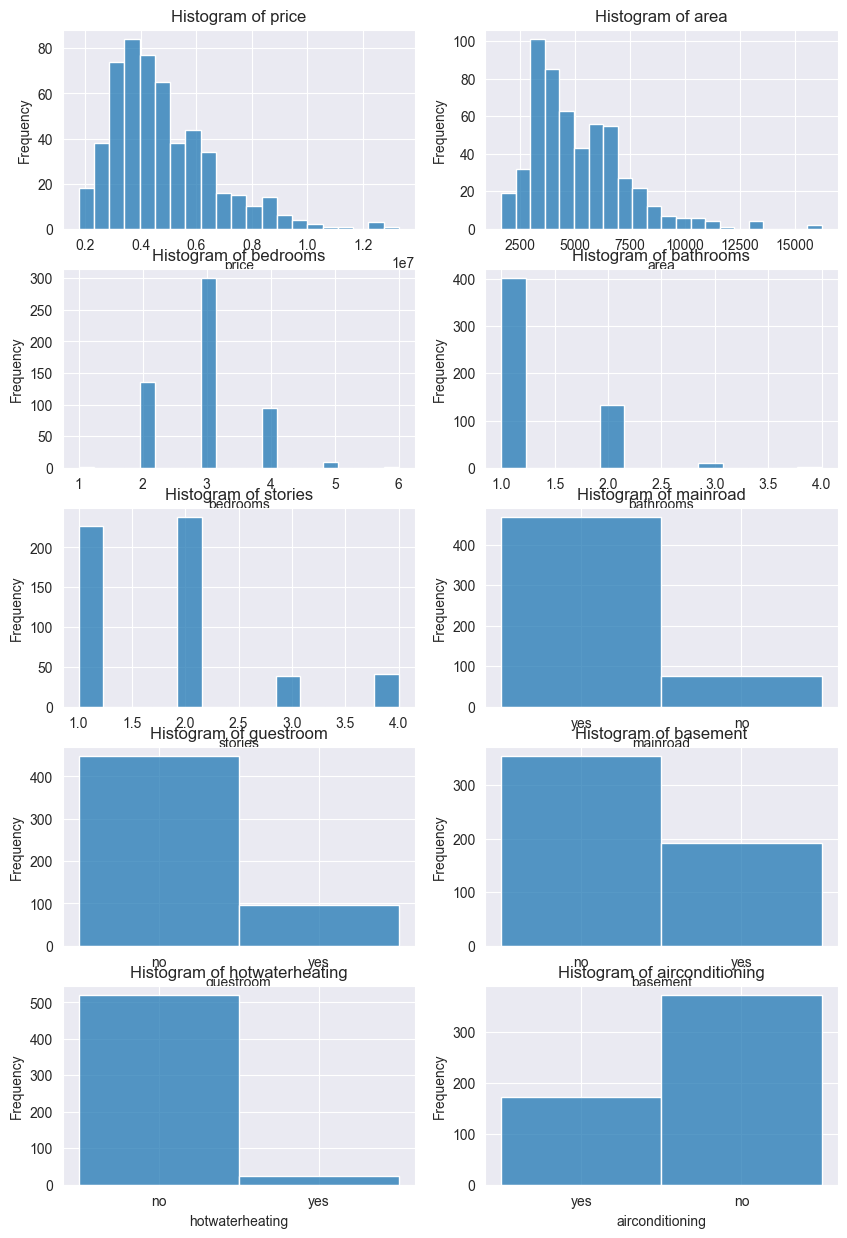

In [46]:
# features_list = ['housing_median_age', 'total_rooms',
#     'total_bedrooms', 'population', 'households', 'median_income',
#     'median_house_value']

fig, ax = plt.subplots(5, 2, figsize=(10, 15))

for i, column in enumerate(df.columns):
    sns.histplot(df[column], ax=ax[i//2, i%2])
    ax[i//2, i%2].set_title(f'Histogram of {column}')
    ax[i//2, i%2].set_xlabel(column)
    ax[i//2, i%2].set_ylabel('Frequency')

plt.tight_layout()

plt.show()

In [39]:
def norm_and_visualize(column_name):
    modifications = [
        ("Original", df[column_name].dropna()),
        ("Log", np.log1p(df[column_name].dropna())),
        ("Sqrt", np.sqrt(df[column_name].dropna())),
        ("Cbrt", np.cbrt(df[column_name].dropna())),
    ]

    fig, axs = plt.subplots(len(modifications), 2, figsize=(12, 10))

    for i, (label, data) in enumerate(modifications):
        # Histogram
        
        data = (data - np.mean(data)) / np.std(data, ddof=1)

        
        axs[i][0].hist(data, bins=50, edgecolor='black')
        axs[i][0].set_title(f'Histogram of {column_name} ({label})')
        axs[i][0].set_xlabel(column_name)
        axs[i][0].set_ylabel('Frequency')

        mu = np.mean(data)
        sigma = np.std(data)

        x = np.linspace(min(data), max(data), 100)
        y = stats.norm.pdf(x, mu, sigma)

        count, bins = np.histogram(data, bins=50)
        y_scaled = y * len(data) * (bins[1] - bins[0])

        axs[i][0].plot(x, y_scaled, 'r-', lw=4)

        # Q-Q plot
        stats.probplot(data, plot=axs[i][1])
        axs[i][1].set_title(f'Q-Q plot of {column_name} ({label})')

        # KS test
        stat, p = stats.kstest(data, 'norm')
        stat = f"{stat:.4f}"
        p = f"{p:.4f}"
        print(f"{label} p-value:", p, "stat:" , stat)

    plt.tight_layout()
    plt.show()

Original p-value: 0.0000 stat: 0.1050
Log p-value: 0.5577 stat: 0.0336
Sqrt p-value: 0.0098 stat: 0.0695
Cbrt p-value: 0.0537 stat: 0.0573


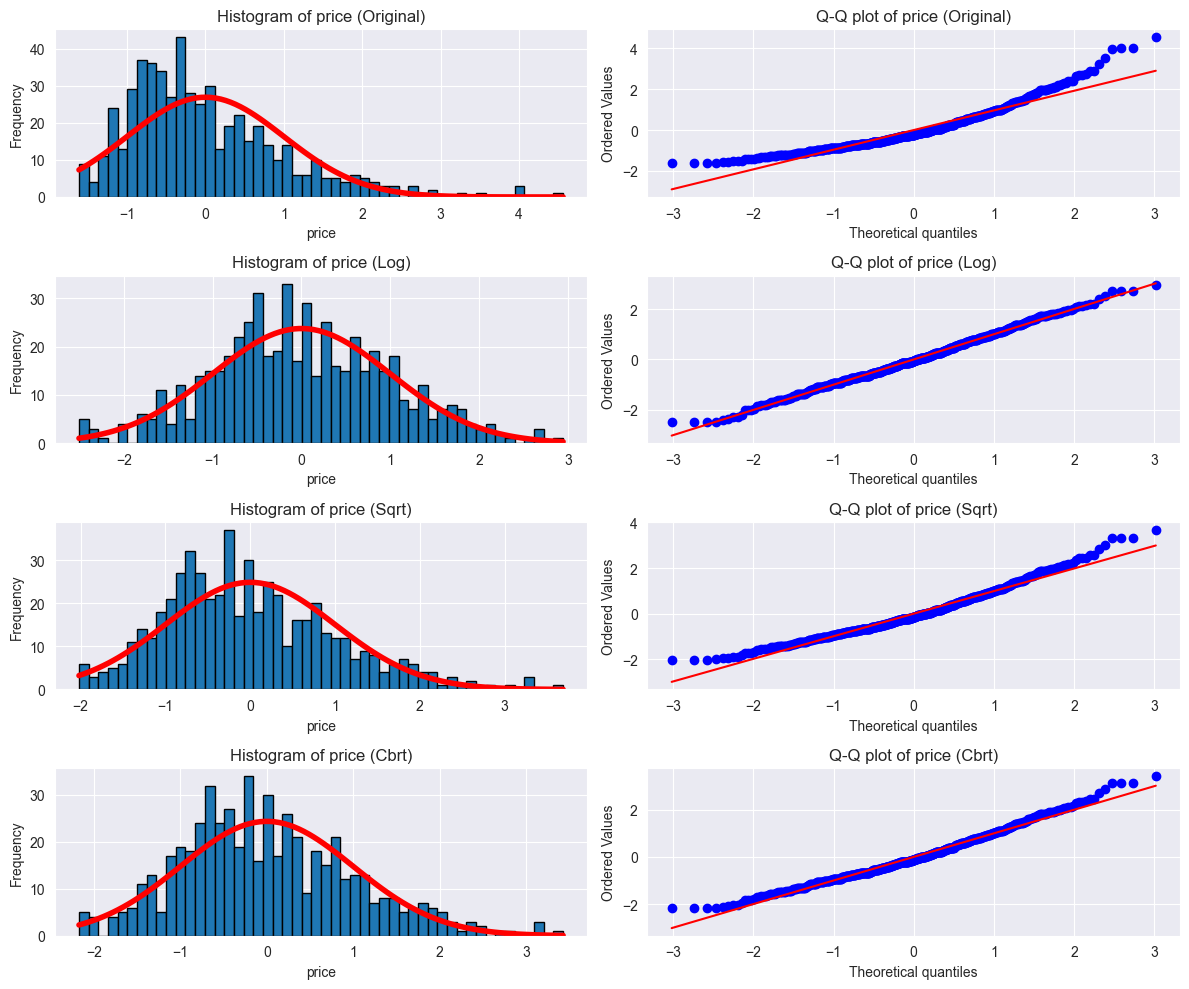

In [47]:
norm_and_visualize('price')

Original p-value: 0.0000 stat: 0.1116
Log p-value: 0.0322 stat: 0.0612
Sqrt p-value: 0.0005 stat: 0.0868
Cbrt p-value: 0.0020 stat: 0.0793


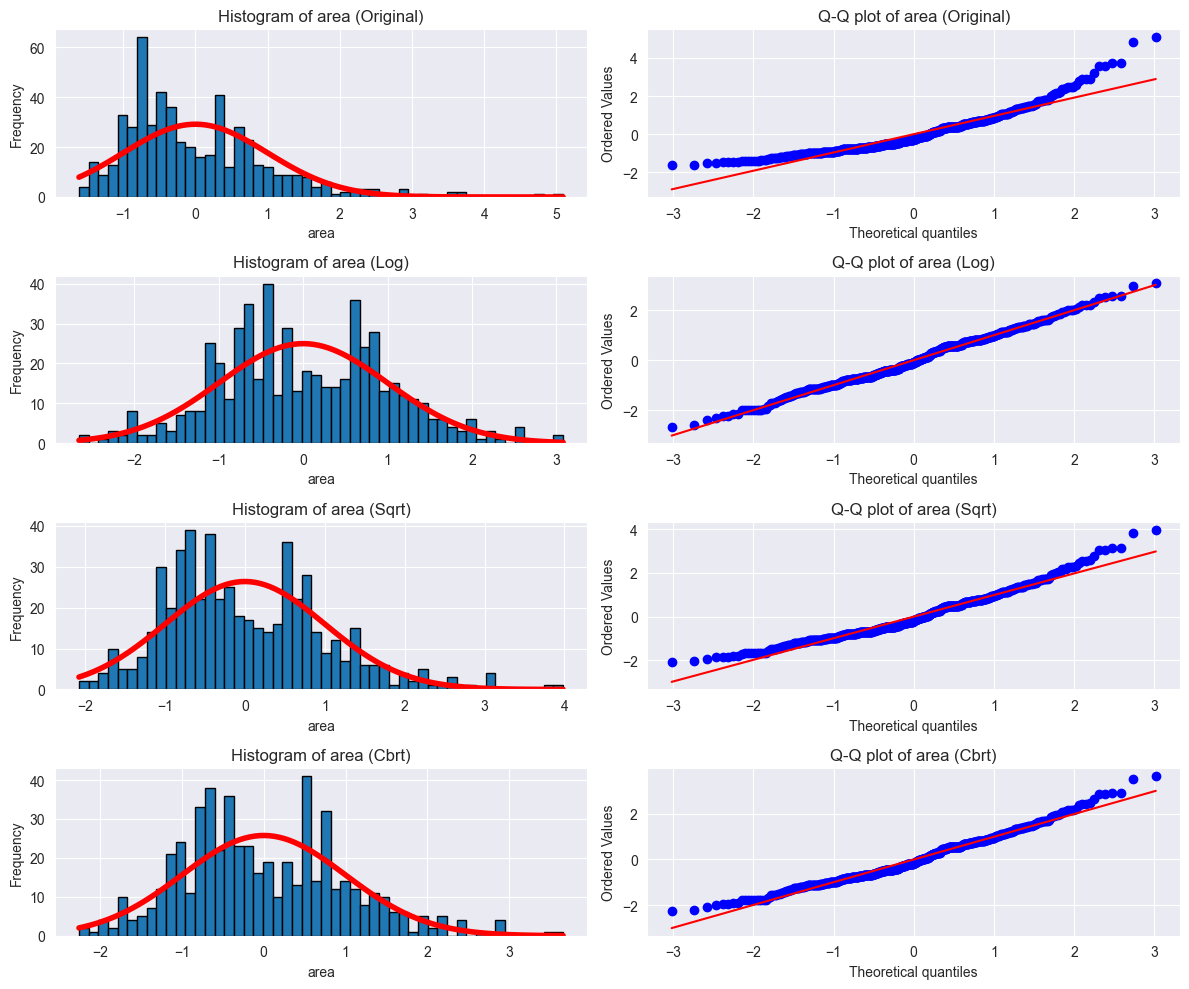

In [50]:
norm_and_visualize('area')